# Movie Genere

#### Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GRU, Input

from sklearn.model_selection import train_test_split

#### Read 'Movie Genere data set.csv' dataset

In [2]:
df = pd.read_csv('Movie genere classification.csv')

In [3]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


#### Check for missing values

In [5]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

#### Check for duplicates, Remove if any

In [6]:
df.duplicated().sum()

418

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df['sentiment'].value_counts()

sentiment
1    24866
0    24685
Name: count, dtype: int64

#### Split the dataset into Input & Target Variables

In [10]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [11]:
X = df['review']
y = df['sentiment']

#### Create Keras tokenizer object with 5000 max words

In [12]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=400, padding='post')
vocab_size = tokenizer.num_words+1

#### Split the dataset into Training & Testing set

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)

#### Create keras Sequential model with GRU layers

In [14]:
model = Sequential()
model.add(Embedding(vocab_size,128,input_shape=(Xtrain.shape[1],)))
model.add(GRU(62))
model.add(Dense(128,activation='elu'))
model.add(Dense(62,activation='elu'))
model.add(Dense(32,activation='elu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\erinr\anaconda3\New folder\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Compile the model

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 400, 128)            │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 62)                  │          35,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,951 (2.65 MB)

 Trainable params: 693,951 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model

In [17]:
model.fit(Xtrain, ytrain, epochs=3, validation_data=(Xtest, ytest))

Epoch 1/3
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 508s 404ms/step - accuracy: 0.5126 - loss: 0.6930 - val_accuracy: 0.5144 - val_loss: 0.6883
Epoch 2/3
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 411s 332ms/step - accuracy: 0.5672 - loss: 0.6493 - val_accuracy: 0.8691 - val_loss: 0.3078
Epoch 3/3
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 415s 335ms/step - accuracy: 0.8976 - loss: 0.2509 - val_accuracy: 0.8981 - val_loss: 0.2451


#### Evaluate the model

In [18]:
model.evaluate(Xtest, ytest)

310/310 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.8990 - loss: 0.2384


[0.24508093297481537, 0.898093044757843]

#### Make predictions with X_test

In [19]:
ypred = model.predict(Xtest)

310/310 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step


In [20]:
ypred = [1 if i>.5 else 0 for i in ypred]

#### Accuracy score

In [21]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [22]:
accuracy_score(ytest, ypred)

0.8980930279487438

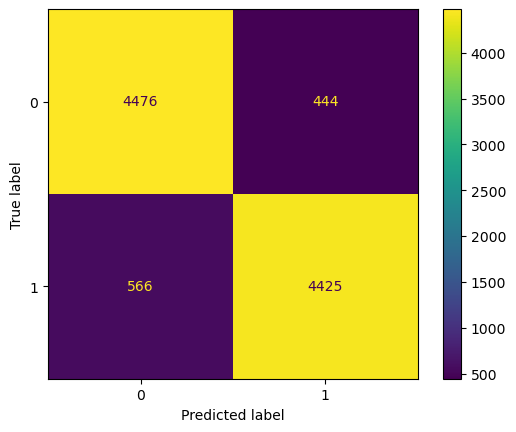

In [23]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred)

In [24]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4920
           1       0.91      0.89      0.90      4991

    accuracy                           0.90      9911
   macro avg       0.90      0.90      0.90      9911
weighted avg       0.90      0.90      0.90      9911

